
Win %: 3.04
Push %: -4.364
Lost %: 2.324
Final Balance : $[0, 10, 0, -20, 20, 35.0, 45.0, 55.0, 65.0, 75.0, 65.0, 45.0, 5.0, 85.0, 85.0, 75.0, 95.0, 105.0, 115.0, 105.0, 105.0, 85.0, 125.0, 115.0, 95.0, 135.0, 150.0, 160.0, 170.0, 160.0, 180.0, 190.0, 180.0, 200.0, 190.0, 210.0, 220.0, 210.0, 230.0, 245.0, 255.0, 255.0, 245.0, 225.0, 225.0, 225.0, 265.0, 265.0, 255.0, 235.0, 295.0, 305.0, 295.0, 315.0, 325.0, 335.0, 325.0, 345.0, 335.0, 355.0, 365.0, 355.0, 375.0, 385.0, 385.0, 375.0, 355.0, 315.0, 435.0, 445.0, 455.0, 445.0, 465.0, 455.0, 435.0, 395.0, 475.0, 465.0, 445.0, 405.0, 325.0, 485.0, 495.0, 485.0, 465.0, 525.0, 515.0, 495.0, 555.0, 545.0, 525.0, 485.0, 405.0, 245.0, 725.0, 740.0, 750.0, 760.0, 770.0, 780.0, 790.0, 800.0, 810.0, 820.0, 830.0, 820.0, 800.0, 840.0, 830.0, 810.0, 850.0, 840.0, 860.0, 870.0, 860.0, 880.0, 870.0, 890.0, 880.0, 900.0, 890.0, 870.0, 830.0, 750.0, 750.0, 590.0, 910.0, 920.0, 930.0, 920.0, 940.0, 950.0, 940.0, 920.0, 960.0, 950.0, 970.0, 980.0, 990.0

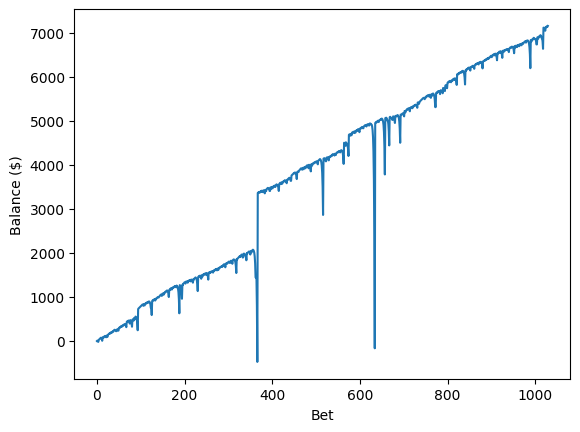

In [34]:
#%%

import random
import matplotlib.pyplot as plt

hard_strategy = {8: ["H", "H", "H", "H", "H", "H", "H", "H", "H", "H"], 
                 9: ["H", "Dh", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 10: ["Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "H", "H"],
                 11: ["Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "H"],
                 12: ["H", "H", "S", "S", "S", "H", "H", "H", "H", "H"],
                 13: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 14: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 15: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 16: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 17: ["S", "S", "S", "S", "S", "S", "S", "S", "S", "S"]}

soft_strategy = {12: ["H", "H", "H", "H", "H", "H", "H", "H", "H", "H"],
                 13: ["H", "H", "H", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 14: ["H", "H", "H", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 15: ["H", "H", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 16: ["H", "H", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 17: ["H", "Dh", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 18: ["S", "Ds", "Ds", "Ds", "Ds", "S", "S", "H", "H", "H"],
                 19: ["S", "S", "S", "S", "S", "S", "S", "S", "S", "S"],
                 20: ["S", "S", "S", "S", "S", "S", "S", "S", "S", "S"]}

split_strategy = {"2": ["Ph", "Ph", "P", "P", "P", "P", "H", "H", "H", "H"],
                  "3": ["Ph", "Ph", "P", "P", "P", "P", "H", "H", "H", "H"],
                  "4": ["H", "H", "H", "Ph", "Ph", "H", "H", "H", "H", "H"],
                  "6": ["Ph", "P", "P", "P", "P", "H", "H", "H", "H", "H"],
                  "7": ["P", "P", "P", "P", "P", "P", "H", "H", "H", "H"],
                  "8": ["P", "P", "P", "P", "P", "P", "P", "P", "P", "P"],
                  "9": ["P", "P", "P", "P", "P", "S", "P", "P", "S", "S"],
                  "A": ["P", "P", "P", "P", "P", "P", "P", "P", "P", "P"]}

def get_card_value(card):
    if card in ['K', 'Q', 'J']:
        return 10
    elif card == 'A':
        return 11
    else:
        return int(card)

def calculate_hand_value(hand):
    value = sum([get_card_value(card) for card in hand])
    num_aces = hand.count('A')

    while value > 21 and num_aces:
        value -= 10
        num_aces -= 1

    soft = False
    if num_aces > 0:
        soft = True

    return value, soft



def make_ai_decision(player_hand, dealer_upcard):

    dealer_value = get_card_value(dealer_upcard)
    player_value, soft = calculate_hand_value(player_hand)
    # print(player_hand)
    # print(player_value)

    if player_value > 21:
        return "bust"

    if player_value == 21:
        return "S"

    elif player_hand[0] == player_hand[1] and player_hand[0] in split_strategy.keys():
        return split_strategy[player_hand[0]][dealer_value - 2]

    elif soft:
        return soft_strategy[player_value][dealer_value - 2]

    else:
        if player_value < 8:
            return hard_strategy[8][dealer_value - 2]
        elif player_value > 17:
            return hard_strategy[17][dealer_value - 2]
        else:
            return hard_strategy[player_value][dealer_value - 2]





def play_blackjack_recursive(player_hand, dealer_hand, deck):

    if calculate_hand_value(player_hand)[0] > 20:
        return [calculate_hand_value(player_hand)[0]]

    current_hand = player_hand

    while True:
        result = make_ai_decision(current_hand, dealer_hand[0])

        if result == "bust":
            return [calculate_hand_value(current_hand)[0]]

        elif result == "Dh":
            # Double down if possible, finish the hand
            if len(current_hand) == 2:
                current_hand.append(deck.pop())
                return [calculate_hand_value(current_hand)[0]]
            else:
                current_hand.append(deck.pop())

        elif result == "Ds":
            # Double down if possible, finish the hand
            if len(current_hand) == 2:
                current_hand.append(deck.pop())
                return [calculate_hand_value(current_hand)[0]]
            else:
                return [calculate_hand_value(current_hand)[0]]

        elif result == "S":
            # Stand and end player turn
            return [calculate_hand_value(current_hand)[0]]

        elif result == "H":
            # Hit, pop a card from the deck and add to hand
            current_hand.append(deck.pop())

            # Check if the total cards in hand are greater than or equal to 5
            # if len(player_hand) >= 5:
            #     return [calculate_hand_value(player_hand)[0]]

        elif result == "P":
            # Split the two cards into two hands, deal a new card to each
            hand1 = [current_hand[0], deck.pop()]
            hand2 = [current_hand[1], deck.pop()]

            # Recursively continue with each split hand
            result1 = play_blackjack_recursive(hand1, dealer_hand, deck)
            result2 = play_blackjack_recursive(hand2, dealer_hand, deck)

            # Combine the results of both hands
            return result1 + result2

        elif result == "Ph":
            # Split if double down after split is possible, otherwise hit and continue
            if len(current_hand) == 2:
                hand1 = [current_hand[0], deck.pop()]
                hand2 = [current_hand[1], deck.pop()]

                # Recursively continue with each split hand
                result1 = play_blackjack_recursive(hand1, dealer_hand, deck)
                result2 = play_blackjack_recursive(hand2, dealer_hand, deck)

                # Combine the results of both hands
                return result1 + result2
            else:
                current_hand.append(deck.pop())


def play_blackjack(player_hand, dealer_hand, deck):
    # Start the recursive process for the main hand
    results = play_blackjack_recursive(player_hand, dealer_hand, deck)

    # Return the final value of each subhand in a list
    return results


def simulate(num_sims=10, print_ = False):
     # Initialize bet and play 100 games or until the AI can no longer bet
    bet = 10
    balance = [0]
    winnings = 0
    losses = 0
    most_consecutive_losses = 0
    consecutive_losses = 0
        
    for i in range(num_sims):
        if print_:
            print(f"\n\n==== Game {i + 1} - Balance: ${balance} - Current Bet: ${bet} ====")

        # Shuffle the deck
        deck = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'] * 4 * 4
        random.shuffle(deck)

        # Initialize hands for the player and the dealer
        player_hand = [deck.pop(), deck.pop()]
        dealer_hand = [deck.pop(), deck.pop()]

        if calculate_hand_value(player_hand)[0] == 21:
            winnings += bet * 1.5
            balance.append(balance[-1] + bet * 1.5)
            bet = 10
            consecutive_losses = 0
        
        else:

            # Player's turn
            final_hand_values = play_blackjack(player_hand, dealer_hand, deck)

            # Dealer's turn
            new_dealer_hand = dealer_hand
            while calculate_hand_value(dealer_hand)[0] < 17 or (calculate_hand_value(dealer_hand)[0] == 17 and 'A' in dealer_hand):
                new_dealer_hand.append(deck.pop())

            if print_:
                print("Player Hand:", player_hand)
                print("Dealer Card:", dealer_hand[0])

            if print_:
                print("Player Hand Values:", final_hand_values)
                print("Dealer Hand Value:", calculate_hand_value(dealer_hand)[0])

            total_result = 0
            for hand_value in final_hand_values:    
                        
                # Determine the winner
                if hand_value > 21:
                    if print_:
                        print("Bust! You lose: -$" + str(bet))
                    balance.append(balance[-1] - bet)
                    losses += bet
                    bet *= 2
                    consecutive_losses += 1

                elif calculate_hand_value(dealer_hand)[0] > 21:
                    if print_:
                        print("Dealer bust! You win: +$" + str(bet))
                    balance.append(balance[-1] + bet)
                    winnings += bet
                    bet = 10
                    consecutive_losses = 0

                elif hand_value > calculate_hand_value(dealer_hand)[0]:
                    if print_:
                        print("You win: +$" + str(bet))
                    balance.append(balance[-1] + bet)
                    winnings += bet
                    bet = 10
                    consecutive_losses = 0

                elif hand_value == calculate_hand_value(dealer_hand)[0]:
                    if print_:
                        print("It's a tie: No change")
                    balance.append(balance[-1])                 

                else:
                    if print_:
                        print("Dealer Had Higher! You lose: -$" + str(bet))
                    balance.append(balance[-1] - bet)
                    losses += bet
                    bet *= 2
                    consecutive_losses += 1
            if consecutive_losses > most_consecutive_losses:
                most_consecutive_losses = consecutive_losses
        
        # print(f"\nSimulation Summary:", i+1)
        # print(f"Total Games Played: {total_games}")
        # print(f"Final Balance: ${balance}")
        # print(f"Total Amount Won/Lost: ${total_won}")
        # print(f"Peak Balance: ${peak_balance}")
    print(f"\nWin %: {winnings/(bet * num_sims)}")
    print(f"Push %: {(bet * num_sims - winnings - losses)/(bet * num_sims)}")
    print(f"Lost %: {losses/(bet * num_sims)}")    
    print(f"Most Consecutive Losses: {most_consecutive_losses}")

    plt.plot(balance)
    plt.ylabel('Balance ($)')
    plt.xlabel('Bet')
    plt.show()


if __name__ == "__main__":
    simulate(1000, False)